In [66]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [67]:
data1 = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_01_02_order_book_final.csv'
data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
data_book_02 = data1[['0','1','2','3']]

In [68]:
data_book_02_open = data_book_02[292*4:67229*4+1]
data_book_02_open = data_book_02_open.reset_index(drop = True)

In [7]:
#data_book_02_open

In [69]:
data = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.01.02.csv'
data = pd.read_csv(datapath)
data_CNF14 = data[data.Series == 'CNF14']
data = data_CNF14
market_open_time = data[data['TimeStamp'].str.contains('2014-01-02D09:00')].index.tolist()[0] 
market_close_time = data[data['TimeStamp'].str.contains('2014-01-02D16:00')].index.tolist()[0] 
data_open = data[market_open_time:market_close_time+1]
data_open.loc[data_open.BidOrAsk == 'A',['Trade']] = ' '
data_open['Price'][data_open.Trade == ' '] = 0
data_open = data_open.loc[data_open.groupby('TimeStamp')["Price"].idxmin()]
data_trade = data_open[['TimeStamp','Price','Trade']].reset_index(drop = True)

/home/bigdatas16/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [70]:
def BidQ123_AskQ123(data_book_28_open):
    Bid1 = []
    Bid2 = []
    Bid3 = []
    Bid1_Quantity = []
    Bid2_Quantity = []
    Bid3_Quantity = []
    Ask1 = []
    Ask2 = []
    Ask3 = []
    Ask1_Quantity = []
    Ask2_Quantity = []
    Ask3_Quantity = []

    TimeStamp = []
    for i in range(1,len(data_book_28_open),4):
        #print data_book_28_open.iloc[i]['0']
        #print data_book_28_open.iloc[i]['2']
        Bid1.append(float(data_book_28_open.iloc[i]['0'])/100.0)
        Bid1_Quantity.append(float(data_book_28_open.iloc[i]['1']))

        Bid2.append(float(data_book_28_open.iloc[i + 1]['0'])/100.0)
        Bid2_Quantity.append(float(data_book_28_open.iloc[i + 1]['1']))  

        Bid3.append(float(data_book_28_open.iloc[i + 2]['0'])/100.0)
        Bid3_Quantity.append(float(data_book_28_open.iloc[i + 2]['1']))  

        Ask1.append(float(data_book_28_open.iloc[i]['2'])/100.0) 
        Ask1_Quantity.append(float(data_book_28_open.iloc[i]['3']))

        Ask2.append(float(data_book_28_open.iloc[i + 1]['2'])/100.0) 
        Ask2_Quantity.append(float(data_book_28_open.iloc[i + 1]['3']))    

        Ask3.append(float(data_book_28_open.iloc[i + 2]['2'])/100.0) 
        Ask3_Quantity.append(float(data_book_28_open.iloc[i + 2]['3']))    
        TimeStamp.append(data_book_28_open.iloc[i-1][1])
    return Bid1,Bid2,Bid3,Ask1,Ask2,Ask3,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity

In [71]:
import time 
start = time.time()
Bid1,Bid2,Bid3,Ask1,Ask2,Ask3,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity = BidQ123_AskQ123(data_book_02_open)
end = time.time()  
print "Total time = %f"%(end - start)  

Total time = 131.081483


In [72]:
def data_time_split(data_trade,day):
    data_trade = data_trade.reset_index(drop = True)
    #print data_trade
    #print '2014-01-'+day+'D09:30'
    data_trade_time_series_0900_0930 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D09:30')].index.tolist()[0]
    data_trade_time_series_0930_1000 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D10:00')].index.tolist()[0]
    data_trade_time_series_1000_1030 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D10:30')].index.tolist()[0]
    data_trade_time_series_1030_1100 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D11:00')].index.tolist()[0]
    data_trade_time_series_1100_1130 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D11:30')].index.tolist()[0]
    data_trade_time_series_1130_1200 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D12:00')].index.tolist()[0]
    data_trade_time_series_1200_1230 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D12:30')].index.tolist()[0]
    data_trade_time_series_1230_1300 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D13:00')].index.tolist()[0]
    data_trade_time_series_1300_1330 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D13:30')].index.tolist()[0]
    data_trade_time_series_1330_1400 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D14:00')].index.tolist()[0]
    data_trade_time_series_1400_1430 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D14:30')].index.tolist()[0]
    data_trade_time_series_1430_1500 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D15:00')].index.tolist()[0]
    data_trade_time_series_1500_1530 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D15:30')].index.tolist()[0]
    data_trade_time_series_1530_1600 = data_trade[data_trade['TimeStamp'].str.contains('2014-01-'+day+'D16:00')].index.tolist()[0]
    return data_trade_time_series_0900_0930,data_trade_time_series_0930_1000,data_trade_time_series_1000_1030,data_trade_time_series_1030_1100,\
           data_trade_time_series_1100_1130,data_trade_time_series_1130_1200,data_trade_time_series_1200_1230,data_trade_time_series_1230_1300,\
           data_trade_time_series_1300_1330,data_trade_time_series_1330_1400,data_trade_time_series_1400_1430,data_trade_time_series_1430_1500,\
           data_trade_time_series_1500_1530,data_trade_time_series_1530_1600

In [73]:
day = '02'
data_trade_time_series_0900_0930,data_trade_time_series_0930_1000,data_trade_time_series_1000_1030,data_trade_time_series_1030_1100,\
data_trade_time_series_1100_1130,data_trade_time_series_1130_1200,data_trade_time_series_1200_1230,data_trade_time_series_1230_1300,\
data_trade_time_series_1300_1330,data_trade_time_series_1330_1400,data_trade_time_series_1400_1430,data_trade_time_series_1430_1500,\
data_trade_time_series_1500_1530,data_trade_time_series_1530_1600 = data_time_split(data_trade,day)

In [74]:
import time 
start = time.time()
min_Ask1_time_series = []
min_Ask1_time_series.append(0)
for i in range(1,len(Ask1),1):
    min_Ask1_time_series.append(min(Ask1[i:]))
    
max_Bid1_time_series = []
max_Bid1_time_series.append(0)
for i in range(1,len(Bid1),1):
    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 233.167759


In [75]:
import time 
start = time.time()
min_Ask1_time_series = []
min_Ask1_time_series.append(0)
for i in range(1,len(Ask1),1):
    min_Ask1_time_series.append(min(Ask1[i:]))
    
max_Bid1_time_series = []
max_Bid1_time_series.append(0)
for i in range(1,len(Bid1),1):
    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 
data_trade_timestamp = data_trade.TimeStamp
bid1_ask1_spread = array(Ask1) - array(Bid1)
Close_Price = 7030

Total time = 193.715777


In [76]:
data_trade_timestamp = data_trade.TimeStamp
bid1_ask1_spread = array(Ask1) - array(Bid1)
Close_Price = 7030

In [ ]:
len(data_trade_timestamp)

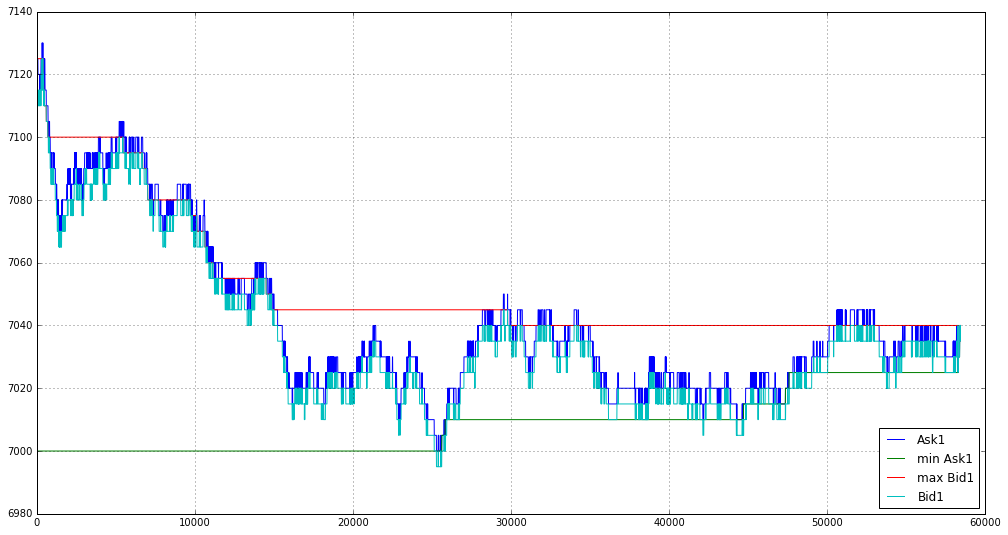

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,9))
plt.grid()
plot(Ask1[0:data_trade_time_series_1530_1600],label = 'Ask1')
#plot(Ask2[0:data_trade_time_series_1530_1600],label = 'Ask2')
#plot(Ask3[0:data_trade_time_series_1530_1600],label = 'Ask3')
plot(min_Ask1_time_series[0:data_trade_time_series_1530_1600],label = 'min Ask1')
plot(max_Bid1_time_series[0:data_trade_time_series_1530_1600],label = 'max Bid1')

plot(Bid1[0:data_trade_time_series_1530_1600],label = 'Bid1')
#plot(Bid2[0:data_trade_time_series_1530_1600],label = 'Bid2')
#plot(Bid3[0:data_trade_time_series_1530_1600],label = 'Bid3')
plt.ylim(6980,7140)
plt.legend(loc = 4)

In [78]:
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20
def divid_weighted_five_category(Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity,weight1,weight2,weight3):
    weighted_Bid = array(Bid1_Quantity) * weight1 + array(Bid2_Quantity) * weight2 + array(Bid3_Quantity) * weight3
    weighted_Ask = array(Ask1_Quantity) * weight1 + array(Ask2_Quantity) * weight2 + array(Ask3_Quantity) * weight3
    divid_weighted3 = weighted_Bid / weighted_Ask
    return np.percentile(divid_weighted3,20),np.percentile(divid_weighted3,40),np.percentile(divid_weighted3,60),np.percentile(divid_weighted3,80)

In [161]:
211580./284

745.0

In [143]:
2221./691

3.2141823444283646

In [33]:
a = [1,2,3,4,5]
b = [2,3,4,5,6]
array(a)*(1.0) / array(b)

array([ 0.5       ,  0.66666667,  0.75      ,  0.8       ,  0.83333333])

In [79]:
#2014-01-02 close price = 7030
#0.6177
#0.8696
#1.0678
#1.3835
#category = 0.7 0.9 1.1 1.3
def bid_stat_time_spread_divid_category(Bid1,Ask1,min_Ask1_time_series\
                           ,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity\
                           ,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity\
                           ,weight1,weight2,weight3\
                           ,data_trade_time_series_0900_0930\
                           ,data_trade_time_series_0930_1000\
                           ,data_trade_time_series_1000_1030\
                           ,data_trade_time_series_1030_1100\
                           ,data_trade_time_series_1100_1130\
                           ,data_trade_time_series_1130_1200\
                           ,data_trade_time_series_1200_1230\
                           ,data_trade_time_series_1230_1300\
                           ,data_trade_time_series_1300_1330\
                           ,data_trade_time_series_1330_1400\
                           ,data_trade_time_series_1400_1430\
                           ,data_trade_time_series_1430_1500\
                           ,data_trade_time_series_1500_1530\
                           ,data_trade_time_series_1530_1600\
                           ,Close_Price,data_trade_timestamp):
    N_spr5 = []
    N_spr10 = []
    N_spr5_one = [] 
    N_spr10_one = []   
    N_spr5_two = [] 
    N_spr10_two = []
    N_spr5_three = [] 
    N_spr10_three = []        
    N_spr5_four = [] 
    N_spr10_four = [] 
    N_spr5_five = [] 
    N_spr10_five = []    
        
        
    Bid1_traded_spr5_category_one = 0
    Bid1_traded_expected_spr5_category_one = 0
    Bid1_traded_spr10_category_one = 0
    Bid1_traded_expected_spr10_category_one = 0
    N_spr5_category_one = 0
    N_spr10_category_one = 0
    MDD_traded_spr5_category_one = 0
    MDD_traded_spr10_category_one = 0
    traded_time_spr5_category_one = 0
    traded_time_spr10_category_one = 0
    N_spr5_category_one_traded = 0
    N_spr10_category_one_traded = 0
    traded_time_spr5_category_one_traded = 0
    traded_time_spr10_category_one_traded = 0
    
    Bid1_traded_spr5_category_two = 0
    Bid1_traded_expected_spr5_category_two = 0
    Bid1_traded_spr10_category_two = 0
    Bid1_traded_expected_spr10_category_two = 0
    N_spr5_category_two = 0
    N_spr10_category_two = 0
    MDD_traded_spr5_category_two = 0
    MDD_traded_spr10_category_two = 0
    traded_time_spr5_category_two = 0
    traded_time_spr10_category_two = 0
    N_spr5_category_two_traded = 0
    N_spr10_category_two_traded = 0
    traded_time_spr5_category_two_traded = 0
    traded_time_spr10_category_two_traded = 0
    
    Bid1_traded_spr5_category_three = 0
    Bid1_traded_expected_spr5_category_three = 0
    Bid1_traded_spr10_category_three = 0
    Bid1_traded_expected_spr10_category_three = 0
    N_spr5_category_three = 0
    N_spr10_category_three = 0
    MDD_traded_spr5_category_three = 0
    MDD_traded_spr10_category_three = 0
    traded_time_spr5_category_three = 0
    traded_time_spr10_category_three = 0
    N_spr5_category_three_traded = 0
    N_spr10_category_three_traded = 0
    traded_time_spr5_category_three_traded = 0
    traded_time_spr10_category_three_traded = 0
    
    Bid1_traded_spr5_category_four = 0
    Bid1_traded_expected_spr5_category_four = 0
    Bid1_traded_spr10_category_four = 0
    Bid1_traded_expected_spr10_category_four = 0
    N_spr5_category_four = 0
    N_spr10_category_four = 0
    MDD_traded_spr5_category_four = 0
    MDD_traded_spr10_category_four = 0
    traded_time_spr5_category_four = 0
    traded_time_spr10_category_four = 0
    N_spr5_category_four_traded = 0
    N_spr10_category_four_traded = 0
    traded_time_spr5_category_four_traded = 0
    traded_time_spr10_category_four_traded = 0
    
    Bid1_traded_spr5_category_five = 0
    Bid1_traded_expected_spr5_category_five = 0
    Bid1_traded_spr10_category_five = 0
    Bid1_traded_expected_spr10_category_five = 0
    N_spr5_category_five = 0
    N_spr10_category_five = 0
    MDD_traded_spr5_category_five = 0
    MDD_traded_spr10_category_five = 0    
    traded_time_spr5_category_five = 0
    traded_time_spr10_category_five = 0    
    N_spr5_category_five_traded = 0
    N_spr10_category_five_traded = 0
    traded_time_spr5_category_five_traded = 0
    traded_time_spr10_category_five_traded = 0
  
    ###one week
    #divid_weighted_five_categories = divid_weighted_five_category(Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity,weight1,weight2,weight3)

    #print divid_weighted_five_categories

    for i in range(0,data_trade_time_series_1530_1600,1):
        #print i
        #print Bid1[i]
        #print min_Ask1_time_series[i+1]
        weighted_Bid = Bid1_Quantity[i] * weight1 + Bid2_Quantity[i] * weight2 + Bid3_Quantity[i] * weight3
        weighted_Ask = Ask1_Quantity[i] * weight1 + Ask2_Quantity[i] * weight2 + Ask3_Quantity[i] * weight3  
        #print weighted_Bid
        #print weighted_Ask
        #print (weighted_Bid*(1.0) / weighted_Ask)
        #print '\t'
        if (weighted_Bid*(1.0) / weighted_Ask) <= 0.7:#divid_weighted_five_categories[0]:  
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_one = N_spr5_category_one + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_one = Bid1_traded_spr5_category_one + 1
                    Bid1_traded_expected_spr5_category_one = Bid1_traded_expected_spr5_category_one + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_one = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_one 
                    #print MDD_traded_spr5_category_one
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_one = traded_time_spr5_category_one + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_one
                    
                    N_spr5_category_one_traded = N_spr5_category_one_traded + 1
                    #print N_spr5_category_one_traded
                    traded_time_spr5_category_one_traded = traded_time_spr5_category_one_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_one_traded
                else:
                    Bid1_traded_expected_spr5_category_one = Bid1_traded_expected_spr5_category_one + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
                    MDD_traded_spr5_category_one = MDD_traded_spr5_category_one + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    #print MDD_traded_spr5_category_one
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr5_category_one = traded_time_spr5_category_one + (time_traded_second - time_start_second)

            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_one = N_spr10_category_one + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr10_category_one = Bid1_traded_spr10_category_one + 1
                    Bid1_traded_expected_spr10_category_one = Bid1_traded_expected_spr10_category_one + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_one = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_one
                    #print MDD_traded_spr10_category_one
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_one = traded_time_spr10_category_one + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_one
                    
                    N_spr10_category_one_traded = N_spr10_category_one_traded + 1
                    #print N_spr10_category_one_traded
                    traded_time_spr10_category_one_traded = traded_time_spr10_category_one_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_one_traded
                else:
                    Bid1_traded_expected_spr10_category_one = Bid1_traded_expected_spr10_category_one + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
                    MDD_traded_spr10_category_one = MDD_traded_spr10_category_one + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    #print MDD_traded_spr10_category_one
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr10_category_one = traded_time_spr10_category_one + (time_traded_second - time_start_second)

            else:
                pass

        elif 0.7 < (weighted_Bid*(1.0) / weighted_Ask) <= 0.9:#divid_weighted_five_categories[1]:
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_two = N_spr5_category_two + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_two = Bid1_traded_spr5_category_two + 1
                    Bid1_traded_expected_spr5_category_two = Bid1_traded_expected_spr5_category_two + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_two = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_two 
                    #print MDD_traded_spr5_category_two              
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_two = traded_time_spr5_category_two + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_two
                    
                    N_spr5_category_two_traded = N_spr5_category_two_traded + 1
                    #print N_spr5_category_two_traded
                    traded_time_spr5_category_two_traded = traded_time_spr5_category_two_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_two_traded
                else:
                    Bid1_traded_expected_spr5_category_two = Bid1_traded_expected_spr5_category_two + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
                    MDD_traded_spr5_category_two = MDD_traded_spr5_category_two + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    #print MDD_traded_spr5_category_two  
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr5_category_two = traded_time_spr5_category_two + (time_traded_second - time_start_second)

                    
            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_two = N_spr10_category_two + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr10_category_two = Bid1_traded_spr10_category_two + 1
                    Bid1_traded_expected_spr10_category_two = Bid1_traded_expected_spr10_category_two + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_two = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_two 
                    #print MDD_traded_spr10_category_two                 
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_two = traded_time_spr10_category_two + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_two
                    
                    N_spr10_category_two_traded = N_spr10_category_two_traded + 1
                    #print N_spr10_category_two_traded
                    traded_time_spr10_category_two_traded = traded_time_spr10_category_two_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_two_traded
                else:
                    Bid1_traded_expected_spr10_category_two = Bid1_traded_expected_spr10_category_two + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
                    MDD_traded_spr10_category_two = MDD_traded_spr10_category_two + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr10_category_two = traded_time_spr10_category_two + (time_traded_second - time_start_second)
            else:
                pass    

        elif 0.9 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.1:#divid_weighted_five_categories[2]:
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_three = N_spr5_category_three + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_three = Bid1_traded_spr5_category_three + 1
                    Bid1_traded_expected_spr5_category_three = Bid1_traded_expected_spr5_category_three + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_three = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_three 
                    #print MDD_traded_spr5_category_three    
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_three = traded_time_spr5_category_three + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_three
                    
                    N_spr5_category_three_traded = N_spr5_category_three_traded + 1
                    #print N_spr5_category_three_traded
                    traded_time_spr5_category_three_traded = traded_time_spr5_category_three_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_three_traded
                    
                else:
                    Bid1_traded_expected_spr5_category_three = Bid1_traded_expected_spr5_category_three + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
                    MDD_traded_spr5_category_three = MDD_traded_spr5_category_three + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr5_category_three = traded_time_spr5_category_three + (time_traded_second - time_start_second)

            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_three = N_spr10_category_three + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1[i]
                    #print Ask1[i]
                    Bid1_traded_spr10_category_three = Bid1_traded_spr10_category_three + 1
                    Bid1_traded_expected_spr10_category_three = Bid1_traded_expected_spr10_category_three + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_three = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_three 
                    #print MDD_traded_spr10_category_three               
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_three = traded_time_spr10_category_three + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_three
                    
                    N_spr10_category_three_traded = N_spr10_category_three_traded + 1
                    #print N_spr10_category_three_traded
                    traded_time_spr10_category_three_traded = traded_time_spr10_category_three_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_three_traded
                    
                    
                else:
                    Bid1_traded_expected_spr10_category_three = Bid1_traded_expected_spr10_category_three + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print 'a2 = %f'%(Bid1_traded_expected_spr10_category_three)
                    MDD_traded_spr10_category_three = MDD_traded_spr10_category_three + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr10_category_three = traded_time_spr10_category_three + (time_traded_second - time_start_second)
            else:
                pass    

        elif 1.1 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.3:#divid_weighted_five_categories[3]:
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_four = N_spr5_category_four + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_four = Bid1_traded_spr5_category_four + 1
                    Bid1_traded_expected_spr5_category_four = Bid1_traded_expected_spr5_category_four + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_four = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_four 
                    #print MDD_traded_spr5_category_four
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_four = traded_time_spr5_category_four + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_four
                    
                    N_spr5_category_four_traded = N_spr5_category_four_traded + 1
                    #print N_spr5_category_three_traded
                    traded_time_spr5_category_four_traded = traded_time_spr5_category_four_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_three_traded
                    
                else:
                    Bid1_traded_expected_spr5_category_four = Bid1_traded_expected_spr5_category_four + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
                    MDD_traded_spr5_category_four = MDD_traded_spr5_category_four + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr5_category_four = traded_time_spr5_category_four + (time_traded_second - time_start_second)

            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_four = N_spr10_category_four + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1[i]
                    #print Ask1[i]
                    Bid1_traded_spr10_category_four = Bid1_traded_spr10_category_four + 1
                    Bid1_traded_expected_spr10_category_four = Bid1_traded_expected_spr10_category_four + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_four = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_four 
                    #print MDD_traded_spr10_category_four 
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_four = traded_time_spr10_category_four + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_four
                    
                    N_spr10_category_four_traded = N_spr10_category_four_traded + 1
                    #print N_spr5_category_three_traded
                    traded_time_spr10_category_four_traded = traded_time_spr10_category_four_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_three_traded
                    
                else:
                    Bid1_traded_expected_spr10_category_four = Bid1_traded_expected_spr10_category_four + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print 'a2 = %f'%(Bid1_traded_expected_spr10_category_four)
                    MDD_traded_spr10_category_four = MDD_traded_spr10_category_four + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr10_category_four = traded_time_spr10_category_four + (time_traded_second - time_start_second)
            else:
                pass    

        elif 1.30 < (weighted_Bid*(1.0) / weighted_Ask): 
            if bid1_ask1_spread[i] == 5:
                N_spr5_category_five = N_spr5_category_five + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1_traded
                    Bid1_traded_spr5_category_five = Bid1_traded_spr5_category_five + 1
                    Bid1_traded_expected_spr5_category_five = Bid1_traded_expected_spr5_category_five + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr5_category_five = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr5_category_five 
                    #print MDD_traded_spr5_category_five
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr5_category_five = traded_time_spr5_category_five + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_five
                    
                    N_spr5_category_five_traded = N_spr5_category_five_traded + 1
                    #print N_spr5_category_five_traded
                    traded_time_spr5_category_five_traded = traded_time_spr5_category_five_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr5_category_five_traded
                    
                else:
                    Bid1_traded_expected_spr5_category_five = Bid1_traded_expected_spr5_category_five + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print Bid1_traded_expected
                    MDD_traded_spr5_category_five = MDD_traded_spr5_category_five + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr5_category_five = traded_time_spr5_category_five + (time_traded_second - time_start_second)

            elif bid1_ask1_spread[i] == 10:
                N_spr10_category_five = N_spr10_category_five + 1
                if Bid1[i] > min_Ask1_time_series[i+1]: 
                    #print 'trade = %d'%(i)
                    #print Bid1[i]
                    #print Ask1[i]
                    Bid1_traded_spr10_category_five = Bid1_traded_spr10_category_five + 1
                    Bid1_traded_expected_spr10_category_five = Bid1_traded_expected_spr10_category_five + (Ask1[i] - Bid1[i])*(1.0)/(5.0)
                    #print 'a1 = %f'%(Bid1_traded_expected_spr10_category_four)
                    first_min_index = np.where(np.array(Ask1[(i+1):]) < Bid1[i])[0][1]
                    #print first_min_index
                    MDD_traded_spr10_category_five = (max(Ask1[(i+1):(i+1+first_min_index)]) - Bid1[i])*(1.0)/(5.0) + MDD_traded_spr10_category_five 
                    #print MDD_traded_spr10_category_five 
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[i + first_min_index]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    #print time_start
                    #print time_traded
                    #print time_start_second
                    #print time_traded_second
                    traded_time_spr10_category_five = traded_time_spr10_category_five + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_five
                    
                    N_spr10_category_five_traded = N_spr10_category_five_traded + 1
                    #print N_spr5_category_five_traded
                    traded_time_spr10_category_five_traded = traded_time_spr10_category_five_traded + (time_traded_second - time_start_second)
                    #print traded_time_spr10_category_five_traded
                else:
                    Bid1_traded_expected_spr10_category_five = Bid1_traded_expected_spr10_category_five + (Ask1[i] - Close_Price)*(1.0)/(5.0)
                    #print 'a2 = %f'%(Bid1_traded_expected_spr10_category_four)
                    MDD_traded_spr10_category_five = MDD_traded_spr10_category_five + (max(Ask1[(i+1):]) - Bid1[i])*(1.0)/(5.0)
                    time_start = data_trade_timestamp[i]
                    time_traded = data_trade_timestamp[len(data_trade_timestamp)-1]
                    time_traded_second = float(time_traded[11])*36000 + float(time_traded[12])*3600 \
                                       + float(time_traded[14])*600 + float(time_traded[15])*60\
                                       + float(time_traded[17])*10 + float(time_traded[18])
                    time_start_second = float(time_start[11])*36000 + float(time_start[12])*3600 \
                                      + float(time_start[14])*600 + float(time_start[15])*60\
                                      + float(time_start[17])*10 + float(time_start[18])
                    traded_time_spr10_category_five = traded_time_spr10_category_five + (time_traded_second - time_start_second)
            else:
                pass    


        #print Bid1_traded_expected_spr10_category_three

        if i == data_trade_time_series_0900_0930 - 1:  
            #N_spr5_0900_0930 = [N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
            #                   N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded]
            #N_spr10_0900_0930 = [N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
            #                   N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded]  
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0        
            #print '\t'        
            continue

        elif i == data_trade_time_series_0930_1000 - 1:   

            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0

            #print '\t'        
            continue
        elif i == data_trade_time_series_1000_1030 - 1:

            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0  
            #print '\t'
            continue
        elif i == data_trade_time_series_1030_1100 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0
            #print '\t'
            continue

        elif i == data_trade_time_series_1100_1130 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0    

            #print '\t'
            continue

        elif i == data_trade_time_series_1130_1200 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0    

            #print '\t'
            continue
        elif i == data_trade_time_series_1200_1230 - 1:

            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0
            #print '\t'
            continue
        elif i == data_trade_time_series_1230_1300 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0
            #print '\t'
            continue
        elif i == data_trade_time_series_1300_1330 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0
            #print '\t'
            continue
        elif i == data_trade_time_series_1330_1400 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0
            #print '\t'
            continue        
        elif i == data_trade_time_series_1400_1430 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0 
            #print '\t'
            continue                                          
        elif i == data_trade_time_series_1430_1500 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0
            #print '\t'
            continue 
        elif i == data_trade_time_series_1500_1530 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
            Bid1_traded_spr5_category_one = 0
            Bid1_traded_expected_spr5_category_one = 0
            Bid1_traded_spr10_category_one = 0
            Bid1_traded_expected_spr10_category_one = 0
            N_spr5_category_one = 0
            N_spr10_category_one = 0
            MDD_traded_spr5_category_one = 0
            MDD_traded_spr10_category_one = 0
            traded_time_spr5_category_one = 0
            traded_time_spr10_category_one = 0
            N_spr5_category_one_traded = 0
            N_spr10_category_one_traded = 0
            traded_time_spr5_category_one_traded = 0
            traded_time_spr10_category_one_traded = 0

            Bid1_traded_spr5_category_two = 0
            Bid1_traded_expected_spr5_category_two = 0
            Bid1_traded_spr10_category_two = 0
            Bid1_traded_expected_spr10_category_two = 0
            N_spr5_category_two = 0
            N_spr10_category_two = 0
            MDD_traded_spr5_category_two = 0
            MDD_traded_spr10_category_two = 0
            traded_time_spr5_category_two = 0
            traded_time_spr10_category_two = 0
            N_spr5_category_two_traded = 0
            N_spr10_category_two_traded = 0
            traded_time_spr5_category_two_traded = 0
            traded_time_spr10_category_two_traded = 0

            Bid1_traded_spr5_category_three = 0
            Bid1_traded_expected_spr5_category_three = 0
            Bid1_traded_spr10_category_three = 0
            Bid1_traded_expected_spr10_category_three = 0
            N_spr5_category_three = 0
            N_spr10_category_three = 0
            MDD_traded_spr5_category_three = 0
            MDD_traded_spr10_category_three = 0
            traded_time_spr5_category_three = 0
            traded_time_spr10_category_three = 0
            N_spr5_category_three_traded = 0
            N_spr10_category_three_traded = 0
            traded_time_spr5_category_three_traded = 0
            traded_time_spr10_category_three_traded = 0

            Bid1_traded_spr5_category_four = 0
            Bid1_traded_expected_spr5_category_four = 0
            Bid1_traded_spr10_category_four = 0
            Bid1_traded_expected_spr10_category_four = 0
            N_spr5_category_four = 0
            N_spr10_category_four = 0
            MDD_traded_spr5_category_four = 0
            MDD_traded_spr10_category_four = 0
            traded_time_spr5_category_four = 0
            traded_time_spr10_category_four = 0
            N_spr5_category_four_traded = 0
            N_spr10_category_four_traded = 0
            traded_time_spr5_category_four_traded = 0
            traded_time_spr10_category_four_traded = 0

            Bid1_traded_spr5_category_five = 0
            Bid1_traded_expected_spr5_category_five = 0
            Bid1_traded_spr10_category_five = 0
            Bid1_traded_expected_spr10_category_five = 0
            N_spr5_category_five = 0
            N_spr10_category_five = 0
            MDD_traded_spr5_category_five = 0
            MDD_traded_spr10_category_five = 0    
            traded_time_spr5_category_five = 0
            traded_time_spr10_category_five = 0    
            N_spr5_category_five_traded = 0
            N_spr10_category_five_traded = 0
            traded_time_spr5_category_five_traded = 0
            traded_time_spr10_category_five_traded = 0
            #print '\t'
            continue 
        elif i == data_trade_time_series_1530_1600 - 1:
            N_spr5.append([N_spr5_category_one,N_spr5_category_two,N_spr5_category_three,N_spr5_category_four,N_spr5_category_five,\
                           N_spr5_category_one_traded,N_spr5_category_two_traded,N_spr5_category_three_traded,N_spr5_category_four_traded,N_spr5_category_five_traded])
            N_spr10.append([N_spr10_category_one,N_spr10_category_two,N_spr10_category_three,N_spr10_category_four,N_spr10_category_five,\
                            N_spr10_category_one_traded,N_spr10_category_two_traded,N_spr10_category_three_traded,N_spr10_category_four_traded,N_spr10_category_five_traded])
            N_spr5_one.append([Bid1_traded_spr5_category_one*(1.0),Bid1_traded_expected_spr5_category_one*(1.0),MDD_traded_spr5_category_one,traded_time_spr5_category_one,traded_time_spr5_category_one_traded])
            N_spr10_one.append([Bid1_traded_spr10_category_one*(1.0),Bid1_traded_expected_spr10_category_one*(1.0),MDD_traded_spr10_category_one,traded_time_spr10_category_one,traded_time_spr10_category_one_traded])
            N_spr5_two.append([Bid1_traded_spr5_category_two*(1.0) ,Bid1_traded_expected_spr5_category_two*(1.0) ,MDD_traded_spr5_category_two ,traded_time_spr5_category_two ,traded_time_spr5_category_two_traded])
            N_spr10_two.append([Bid1_traded_spr10_category_two*(1.0),Bid1_traded_expected_spr10_category_two*(1.0),MDD_traded_spr10_category_two,traded_time_spr10_category_two,traded_time_spr10_category_two_traded])
            N_spr5_three.append([Bid1_traded_spr5_category_three*(1.0) ,Bid1_traded_expected_spr5_category_three*(1.0) ,MDD_traded_spr5_category_three ,traded_time_spr5_category_three ,traded_time_spr5_category_three_traded])
            N_spr10_three.append([Bid1_traded_spr10_category_three*(1.0),Bid1_traded_expected_spr10_category_three*(1.0),MDD_traded_spr10_category_three,traded_time_spr10_category_three,traded_time_spr10_category_three_traded])
            N_spr5_four.append([Bid1_traded_spr5_category_four*(1.0) ,Bid1_traded_expected_spr5_category_four*(1.0) ,MDD_traded_spr5_category_four ,traded_time_spr5_category_four ,traded_time_spr5_category_four_traded])
            N_spr10_four.append([Bid1_traded_spr10_category_four*(1.0),Bid1_traded_expected_spr10_category_four*(1.0),MDD_traded_spr10_category_four,traded_time_spr10_category_four,traded_time_spr10_category_four_traded])
            N_spr5_five.append([Bid1_traded_spr5_category_five*(1.0) ,Bid1_traded_expected_spr5_category_five*(1.0) ,MDD_traded_spr5_category_five ,traded_time_spr5_category_five ,traded_time_spr5_category_five_traded])
            N_spr10_five.append([Bid1_traded_spr10_category_five*(1.0),Bid1_traded_expected_spr10_category_five*(1.0),MDD_traded_spr10_category_five,traded_time_spr10_category_five,traded_time_spr10_category_five_traded])        
            
    return N_spr5,N_spr10,N_spr5_one,N_spr10_one,N_spr5_two,N_spr10_two,N_spr5_three,N_spr10_three,N_spr5_four,N_spr10_four,N_spr5_five,N_spr10_five  
            #print '\t'
            #continue


In [80]:
N_spr5_02,N_spr10_02,N_spr5_one_02,N_spr10_one_02,N_spr5_two_02,N_spr10_two_02,\
N_spr5_three_02,N_spr10_three_02,N_spr5_four_02,N_spr10_four_02,N_spr5_five_02,N_spr10_five_02 = \
bid_stat_time_spread_divid_category(Bid3,Ask1,min_Ask1_time_series\
                           ,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity\
                           ,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity\
                           ,weight1,weight2,weight3\
                           ,data_trade_time_series_0900_0930\
                           ,data_trade_time_series_0930_1000\
                           ,data_trade_time_series_1000_1030\
                           ,data_trade_time_series_1030_1100\
                           ,data_trade_time_series_1100_1130\
                           ,data_trade_time_series_1130_1200\
                           ,data_trade_time_series_1200_1230\
                           ,data_trade_time_series_1230_1300\
                           ,data_trade_time_series_1300_1330\
                           ,data_trade_time_series_1330_1400\
                           ,data_trade_time_series_1400_1430\
                           ,data_trade_time_series_1430_1500\
                           ,data_trade_time_series_1500_1530\
                           ,data_trade_time_series_1530_1600\
                           ,Close_Price,data_trade_timestamp)

In [81]:
def one_week(N_spr5,N_spr10,N_spr5_one,N_spr10_one,N_spr5_two,N_spr10_two,\
             N_spr5_three,N_spr10_three,N_spr5_four,N_spr10_four,N_spr5_five,N_spr10_five):
    
    
    N_spr5_02 = N_spr5
    N_spr10_02 = N_spr10
    N_spr5_one_02 = N_spr5_one
    N_spr10_one_02 = N_spr10_one
    N_spr5_two_02 = N_spr5_two
    N_spr10_two_02 = N_spr10_two
    N_spr5_three_02 = N_spr5_three
    N_spr10_three_02 = N_spr10_three
    N_spr5_four_02 = N_spr5_four
    N_spr10_four_02 = N_spr10_four
    N_spr5_five_02 = N_spr5_five
    N_spr10_five_02 = N_spr10_five
    
    a = 0
    cate_one_5_0900_0930 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_0900_0930 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_0900_0930 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_0900_0930 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_0900_0930 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_0900_0930 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_0900_0930 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_0900_0930 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_0900_0930 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_0900_0930 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    
    a = a + 1
    cate_one_5_0930_1000 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_0930_1000 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_0930_1000 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_0930_1000 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_0930_1000 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_0930_1000 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_0930_1000 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_0930_1000 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_0930_1000 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_0930_1000 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_1000_1030 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_1000_1030 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_1000_1030 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_1000_1030 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_1000_1030 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_1000_1030 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_1000_1030 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_1000_1030 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_1000_1030 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_1000_1030 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_1030_1100 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_1030_1100 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_1030_1100 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_1030_1100 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_1030_1100 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_1030_1100 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_1030_1100 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_1030_1100 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_1030_1100 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_1030_1100 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_5 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_5 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_5 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_5 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_5 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_5 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_5 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_5 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_5 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_5 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_6 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_6 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_6 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_6 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_6 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_6 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_6 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_6 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_6 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_6 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_7 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_7 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_7 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_7 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_7 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_7 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_7 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_7 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_7 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_7 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_8 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_8 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_8 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_8 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_8 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_8 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_8 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_8 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_8 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_8 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_9 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_9 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_9 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_9 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_9 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_9 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_9 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_9 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_9 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_9 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_10 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_10 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_10 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_10 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_10 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_10 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_10 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_10 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_10 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_10 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_11 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_11 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_11 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_11 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_11 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_11 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_11 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_11 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_11 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_11 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_12 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_12 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_12 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_12 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_12 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_12 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_12 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_12 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_12 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_12 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_13 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_13 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_13 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_13 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_13 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_13 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_13 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_13 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_13 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_13 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            
    a = a + 1
    cate_one_5_14 = list(array(N_spr5_one_02[a][0:4])/N_spr5_02[a][0])+[array(N_spr5_one_02[a][4])/N_spr5_02[a][5]]
    cate_one_10_14 = list(array(N_spr10_one_02[a][0:4])/N_spr10_02[a][0])+[array(N_spr10_one_02[a][4])/N_spr10_02[a][5]]
    cate_two_5_14 = list(array(N_spr5_two_02[a][0:4])/N_spr5_02[a][1])+[array(N_spr5_two_02[a][4])/N_spr5_02[a][6]]
    cate_two_10_14 = list(array(N_spr10_two_02[a][0:4])/N_spr10_02[a][1])+[array(N_spr10_two_02[a][4])/N_spr10_02[a][6]]
    cate_three_5_14 = list(array(N_spr5_three_02[a][0:4])/N_spr5_02[a][2])+[array(N_spr5_three_02[a][4])/N_spr5_02[a][7]]
    cate_three_10_14 = list(array(N_spr10_three_02[a][0:4])/N_spr10_02[a][2])+[array(N_spr10_three_02[a][4])/N_spr10_02[a][7]]
    cate_four_5_14 = list(array(N_spr5_four_02[a][0:4])/N_spr5_02[a][3])+[array(N_spr5_four_02[a][4])/N_spr5_02[a][8]]
    cate_four_10_14 = list(array(N_spr10_four_02[a][0:4])/N_spr10_02[a][3])+[array(N_spr10_four_02[a][4])/N_spr10_02[a][8]]
    cate_five_5_14 = list(array(N_spr5_five_02[a][0:4])/N_spr5_02[a][4])+[array(N_spr5_five_02[a][4])/N_spr5_02[a][9]]
    cate_five_10_14 = list(array(N_spr10_five_02[a][0:4])/N_spr10_02[a][4])+[array(N_spr10_five_02[a][4])/N_spr10_02[a][9]]            

        
    return cate_one_5_0900_0930,cate_one_10_0900_0930,cate_two_5_0900_0930,cate_two_10_0900_0930,\
cate_three_5_0900_0930,cate_three_10_0900_0930,cate_four_5_0900_0930,cate_four_10_0900_0930,\
cate_five_5_0900_0930,cate_five_10_0900_0930,\
cate_one_5_0930_1000,cate_one_10_0930_1000,cate_two_5_0930_1000,cate_two_10_0930_1000,\
cate_three_5_0930_1000,cate_three_10_0930_1000,cate_four_5_0930_1000,cate_four_10_0930_1000,\
cate_five_5_0930_1000,cate_five_10_0930_1000,\
cate_one_5_1000_1030,cate_one_10_1000_1030,cate_two_5_1000_1030,cate_two_10_1000_1030,\
cate_three_5_1000_1030,cate_three_10_1000_1030,cate_four_5_1000_1030,cate_four_10_1000_1030,\
cate_five_5_1000_1030,cate_five_10_1000_1030,\
cate_one_5_1030_1100,cate_one_10_1030_1100,cate_two_5_1030_1100,cate_two_10_1030_1100,\
cate_three_5_1030_1100,cate_three_10_1030_1100,cate_four_5_1030_1100,cate_four_10_1030_1100,\
cate_five_5_1030_1100,cate_five_10_1030_1100,\
cate_one_5_5,cate_one_10_5,cate_two_5_5,cate_two_10_5,cate_three_5_5,cate_three_10_5,cate_four_5_5,cate_four_10_5,cate_five_5_5,cate_five_10_5,\
cate_one_5_6,cate_one_10_6,cate_two_5_6,cate_two_10_6,cate_three_5_6,cate_three_10_6,cate_four_5_6,cate_four_10_6,cate_five_5_6,cate_five_10_6,\
cate_one_5_7,cate_one_10_7,cate_two_5_7,cate_two_10_7,cate_three_5_7,cate_three_10_7,cate_four_5_7,cate_four_10_7,cate_five_5_7,cate_five_10_7,\
cate_one_5_8,cate_one_10_8,cate_two_5_8,cate_two_10_8,cate_three_5_8,cate_three_10_8,cate_four_5_8,cate_four_10_8,cate_five_5_8,cate_five_10_8,\
cate_one_5_9,cate_one_10_9,cate_two_5_9,cate_two_10_9,cate_three_5_9,cate_three_10_9,cate_four_5_9,cate_four_10_9,cate_five_5_9,cate_five_10_9,\
cate_one_5_10,cate_one_10_10,cate_two_5_10,cate_two_10_10,cate_three_5_10,cate_three_10_10,cate_four_5_10,cate_four_10_10,cate_five_5_10,cate_five_10_10,\
cate_one_5_11,cate_one_10_11,cate_two_5_11,cate_two_10_11,cate_three_5_11,cate_three_10_11,cate_four_5_11,cate_four_10_11,cate_five_5_11,cate_five_10_11,\
cate_one_5_12,cate_one_10_12,cate_two_5_12,cate_two_10_12,cate_three_5_12,cate_three_10_12,cate_four_5_12,cate_four_10_12,cate_five_5_12,cate_five_10_12,\
cate_one_5_13,cate_one_10_13,cate_two_5_13,cate_two_10_13,cate_three_5_13,cate_three_10_13,cate_four_5_13,cate_four_10_13,cate_five_5_13,cate_five_10_13,\
cate_one_5_14,cate_one_10_14,cate_two_5_14,cate_two_10_14,cate_three_5_14,cate_three_10_14,cate_four_5_14,cate_four_10_14,cate_five_5_14,cate_five_10_14#,\
  

In [82]:
data1 = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_01_03_order_book_final.csv'
data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
data_book_03 = data1[['0','1','2','3']]
data_book_03_open = data_book_03[245*4:79596*4+1]
data_book_03_open = data_book_03_open.reset_index(drop = True)
data = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.01.03.csv'
data = pd.read_csv(datapath)
data_CNF14 = data[data.Series == 'CNF14']
data = data_CNF14
market_open_time = data[data['TimeStamp'].str.contains('2014-01-03D09:00')].index.tolist()[0] 
market_close_time = data[data['TimeStamp'].str.contains('2014-01-03D16:00')].index.tolist()[0] 
data_open = data[market_open_time:market_close_time+1]
data_open.loc[data_open.BidOrAsk == 'A',['Trade']] = ' '
data_open['Price'][data_open.Trade == ' '] = 0
data_open = data_open.loc[data_open.groupby('TimeStamp')["Price"].idxmin()]
data_trade = data_open[['TimeStamp','Price','Trade']].reset_index(drop = True)

/home/bigdatas16/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
import time 
start = time.time()
Bid1,Bid2,Bid3,Ask1,Ask2,Ask3,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity = BidQ123_AskQ123(data_book_03_open)
end = time.time()  
print "Total time = %f"%(end - start)  

Total time = 132.402820


In [84]:
day = '03'
data_trade_time_series_0900_0930,data_trade_time_series_0930_1000,data_trade_time_series_1000_1030,data_trade_time_series_1030_1100,\
data_trade_time_series_1100_1130,data_trade_time_series_1130_1200,data_trade_time_series_1200_1230,data_trade_time_series_1230_1300,\
data_trade_time_series_1300_1330,data_trade_time_series_1330_1400,data_trade_time_series_1400_1430,data_trade_time_series_1430_1500,\
data_trade_time_series_1500_1530,data_trade_time_series_1530_1600 = data_time_split(data_trade,day)

In [85]:
import time 
start = time.time()
min_Ask1_time_series = []
min_Ask1_time_series.append(0)
for i in range(1,len(Ask1),1):
    min_Ask1_time_series.append(min(Ask1[i:]))
    
max_Bid1_time_series = []
max_Bid1_time_series.append(0)
for i in range(1,len(Bid1),1):
    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 
data_trade_timestamp = data_trade.TimeStamp
bid1_ask1_spread = array(Ask1) - array(Bid1)
Close_Price = 6915

Total time = 363.558969


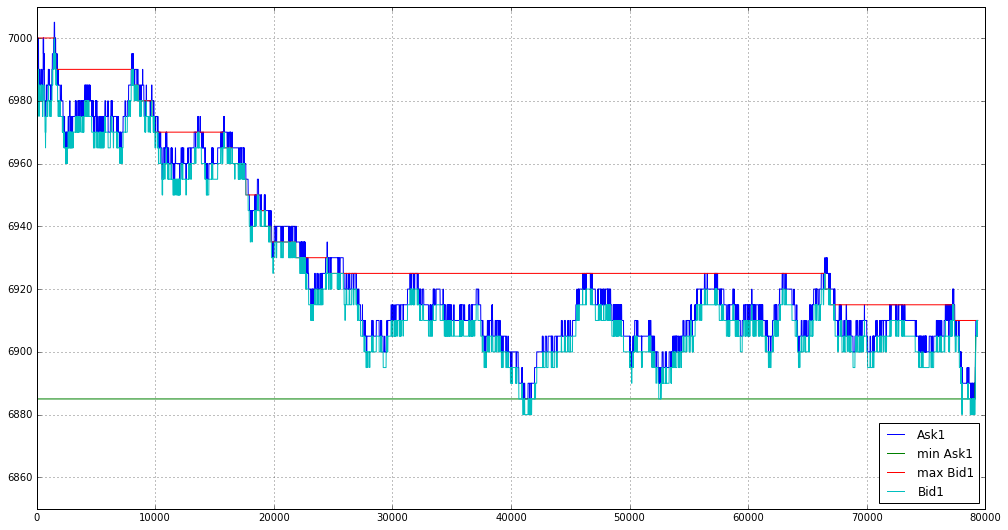

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,9))
plt.grid()
plot(Ask1[0:data_trade_time_series_1530_1600],label = 'Ask1')
#plot(Ask2[0:data_trade_time_series_1530_1600],label = 'Ask2')
#plot(Ask3[0:data_trade_time_series_1530_1600],label = 'Ask3')
plot(min_Ask1_time_series[0:data_trade_time_series_1530_1600],label = 'min Ask1')
plot(max_Bid1_time_series[0:data_trade_time_series_1530_1600],label = 'max Bid1')

plot(Bid1[0:data_trade_time_series_1530_1600],label = 'Bid1')
#plot(Bid2[0:data_trade_time_series_1530_1600],label = 'Bid2')
#plot(Bid3[0:data_trade_time_series_1530_1600],label = 'Bid3')
plt.ylim(6850,7010)
plt.legend(loc = 4)

In [87]:
N_spr5_03,N_spr10_03,N_spr5_one_03,N_spr10_one_03,N_spr5_two_03,N_spr10_two_03,\
N_spr5_three_03,N_spr10_three_03,N_spr5_four_03,N_spr10_four_03,N_spr5_five_03,N_spr10_five_03 = \
bid_stat_time_spread_divid_category(Bid3,Ask1,min_Ask1_time_series\
                           ,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity\
                           ,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity\
                           ,weight1,weight2,weight3\
                           ,data_trade_time_series_0900_0930\
                           ,data_trade_time_series_0930_1000\
                           ,data_trade_time_series_1000_1030\
                           ,data_trade_time_series_1030_1100\
                           ,data_trade_time_series_1100_1130\
                           ,data_trade_time_series_1130_1200\
                           ,data_trade_time_series_1200_1230\
                           ,data_trade_time_series_1230_1300\
                           ,data_trade_time_series_1300_1330\
                           ,data_trade_time_series_1330_1400\
                           ,data_trade_time_series_1400_1430\
                           ,data_trade_time_series_1430_1500\
                           ,data_trade_time_series_1500_1530\
                           ,data_trade_time_series_1530_1600\
                           ,Close_Price,data_trade_timestamp)

In [88]:
data1 = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_01_06_order_book_final.csv'
data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
data_book_06 = data1[['0','1','2','3']]
data_book_06_open = data_book_06[199*4:83210*4+1]
data_book_06_open = data_book_06_open.reset_index(drop = True)
data = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.01.06.csv'
data = pd.read_csv(datapath)
data_CNF14 = data[data.Series == 'CNF14']
data = data_CNF14
market_open_time = data[data['TimeStamp'].str.contains('2014-01-06D09:00')].index.tolist()[0] 
market_close_time = data[data['TimeStamp'].str.contains('2014-01-06D16:00')].index.tolist()[0] 
data_open = data[market_open_time:market_close_time+1]
data_open.loc[data_open.BidOrAsk == 'A',['Trade']] = ' '
data_open['Price'][data_open.Trade == ' '] = 0
data_open = data_open.loc[data_open.groupby('TimeStamp')["Price"].idxmin()]
data_trade = data_open[['TimeStamp','Price','Trade']].reset_index(drop = True)

/home/bigdatas16/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [89]:
import time 
start = time.time()
Bid1,Bid2,Bid3,Ask1,Ask2,Ask3,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity = BidQ123_AskQ123(data_book_06_open)
end = time.time()  
print "Total time = %f"%(end - start)  

Total time = 127.747781


In [90]:
day = '06'
data_trade_time_series_0900_0930,data_trade_time_series_0930_1000,data_trade_time_series_1000_1030,data_trade_time_series_1030_1100,\
data_trade_time_series_1100_1130,data_trade_time_series_1130_1200,data_trade_time_series_1200_1230,data_trade_time_series_1230_1300,\
data_trade_time_series_1300_1330,data_trade_time_series_1330_1400,data_trade_time_series_1400_1430,data_trade_time_series_1430_1500,\
data_trade_time_series_1500_1530,data_trade_time_series_1530_1600 = data_time_split(data_trade,day)

In [91]:
import time 
start = time.time()
min_Ask1_time_series = []
min_Ask1_time_series.append(0)
for i in range(1,len(Ask1),1):
    min_Ask1_time_series.append(min(Ask1[i:]))
    
max_Bid1_time_series = []
max_Bid1_time_series.append(0)
for i in range(1,len(Bid1),1):
    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 
data_trade_timestamp = data_trade.TimeStamp
bid1_ask1_spread = array(Ask1) - array(Bid1)
Close_Price = 6806

Total time = 447.153812


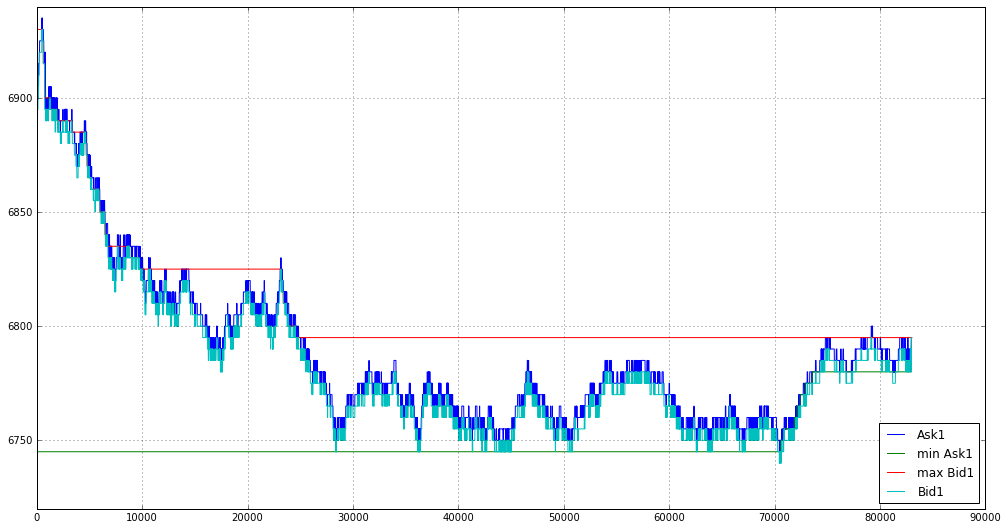

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,9))
plt.grid()
plot(Ask1[0:data_trade_time_series_1530_1600],label = 'Ask1')
#plot(Ask2[0:data_trade_time_series_1530_1600],label = 'Ask2')
#plot(Ask3[0:data_trade_time_series_1530_1600],label = 'Ask3')
plot(min_Ask1_time_series[0:data_trade_time_series_1530_1600],label = 'min Ask1')
plot(max_Bid1_time_series[0:data_trade_time_series_1530_1600],label = 'max Bid1')

plot(Bid1[0:data_trade_time_series_1530_1600],label = 'Bid1')
#plot(Bid2[0:data_trade_time_series_1530_1600],label = 'Bid2')
#plot(Bid3[0:data_trade_time_series_1530_1600],label = 'Bid3')
plt.ylim(6720,6940)
plt.legend(loc = 4)

In [93]:
N_spr5_06,N_spr10_06,N_spr5_one_06,N_spr10_one_06,N_spr5_two_06,N_spr10_two_06,\
N_spr5_three_06,N_spr10_three_06,N_spr5_four_06,N_spr10_four_06,N_spr5_five_06,N_spr10_five_06 = \
bid_stat_time_spread_divid_category(Bid3,Ask1,min_Ask1_time_series\
                           ,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity\
                           ,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity\
                           ,weight1,weight2,weight3\
                           ,data_trade_time_series_0900_0930\
                           ,data_trade_time_series_0930_1000\
                           ,data_trade_time_series_1000_1030\
                           ,data_trade_time_series_1030_1100\
                           ,data_trade_time_series_1100_1130\
                           ,data_trade_time_series_1130_1200\
                           ,data_trade_time_series_1200_1230\
                           ,data_trade_time_series_1230_1300\
                           ,data_trade_time_series_1300_1330\
                           ,data_trade_time_series_1330_1400\
                           ,data_trade_time_series_1400_1430\
                           ,data_trade_time_series_1430_1500\
                           ,data_trade_time_series_1500_1530\
                           ,data_trade_time_series_1530_1600\
                           ,Close_Price,data_trade_timestamp)

In [94]:
day = '07'
data1 = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_01_'+str(day)+'_order_book_final.csv'
data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
data_book_ = data1[['0','1','2','3']]
data_book_open = data_book_[259*4:83210*4+1]
data_book_open = data_book_open.reset_index(drop = True)
data = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.01.'+str(day)+'.csv'
data = pd.read_csv(datapath)
data_CNF14 = data[data.Series == 'CNF14']
data = data_CNF14
market_open_time = data[data['TimeStamp'].str.contains('2014-01-'+str(day)+'D09:00')].index.tolist()[0] 
market_close_time = data[data['TimeStamp'].str.contains('2014-01-'+str(day)+'D16:00')].index.tolist()[0] 
data_open = data[market_open_time:market_close_time+1]
data_open.loc[data_open.BidOrAsk == 'A',['Trade']] = ' '
data_open['Price'][data_open.Trade == ' '] = 0
data_open = data_open.loc[data_open.groupby('TimeStamp')["Price"].idxmin()]
data_trade = data_open[['TimeStamp','Price','Trade']].reset_index(drop = True)
import time 
start = time.time()
Bid1,Bid2,Bid3,Ask1,Ask2,Ask3,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity = BidQ123_AskQ123(data_book_open)

data_trade_time_series_0900_0930,data_trade_time_series_0930_1000,data_trade_time_series_1000_1030,data_trade_time_series_1030_1100,\
data_trade_time_series_1100_1130,data_trade_time_series_1130_1200,data_trade_time_series_1200_1230,data_trade_time_series_1230_1300,\
data_trade_time_series_1300_1330,data_trade_time_series_1330_1400,data_trade_time_series_1400_1430,data_trade_time_series_1430_1500,\
data_trade_time_series_1500_1530,data_trade_time_series_1530_1600 = data_time_split(data_trade,day)
min_Ask1_time_series = []
min_Ask1_time_series.append(0)
for i in range(1,len(Ask1),1):
    min_Ask1_time_series.append(min(Ask1[i:]))
    
max_Bid1_time_series = []
max_Bid1_time_series.append(0)
for i in range(1,len(Bid1),1):
    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 
data_trade_timestamp = data_trade.TimeStamp
bid1_ask1_spread = array(Ask1) - array(Bid1)
Close_Price = 6790

end = time.time()  
print "Total time = %f"%(end - start)  




/home/bigdatas16/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Total time = 496.587838
Total time = 496.599904


In [95]:
N_spr5_07,N_spr10_07,N_spr5_one_07,N_spr10_one_07,N_spr5_two_07,N_spr10_two_07,\
N_spr5_three_07,N_spr10_three_07,N_spr5_four_07,N_spr10_four_07,N_spr5_five_07,N_spr10_five_07 = \
bid_stat_time_spread_divid_category(Bid3,Ask1,min_Ask1_time_series\
                           ,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity\
                           ,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity\
                           ,weight1,weight2,weight3\
                           ,data_trade_time_series_0900_0930\
                           ,data_trade_time_series_0930_1000\
                           ,data_trade_time_series_1000_1030\
                           ,data_trade_time_series_1030_1100\
                           ,data_trade_time_series_1100_1130\
                           ,data_trade_time_series_1130_1200\
                           ,data_trade_time_series_1200_1230\
                           ,data_trade_time_series_1230_1300\
                           ,data_trade_time_series_1300_1330\
                           ,data_trade_time_series_1330_1400\
                           ,data_trade_time_series_1400_1430\
                           ,data_trade_time_series_1430_1500\
                           ,data_trade_time_series_1500_1530\
                           ,data_trade_time_series_1530_1600\
                           ,Close_Price,data_trade_timestamp)

In [96]:
day = '08'
data1 = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_01_'+str(day)+'_order_book_final.csv'
data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
data_book_ = data1[['0','1','2','3']]
data_book_open = data_book_[308*4:89100*4]
data_book_open = data_book_open.reset_index(drop = True)
data = []
datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.01.'+str(day)+'.csv'
data = pd.read_csv(datapath)
data_CNF14 = data[data.Series == 'CNF14']
data = data_CNF14
market_open_time = data[data['TimeStamp'].str.contains('2014-01-'+str(day)+'D09:00')].index.tolist()[0] 
market_close_time = data[data['TimeStamp'].str.contains('2014-01-'+str(day)+'D16:00')].index.tolist()[0] 
data_open = data[market_open_time:market_close_time+1]
data_open.loc[data_open.BidOrAsk == 'A',['Trade']] = ' '
data_open['Price'][data_open.Trade == ' '] = 0
data_open = data_open.loc[data_open.groupby('TimeStamp')["Price"].idxmin()]
data_trade = data_open[['TimeStamp','Price','Trade']].reset_index(drop = True)
import time 
start = time.time()
Bid1,Bid2,Bid3,Ask1,Ask2,Ask3,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity = BidQ123_AskQ123(data_book_open)

data_trade_time_series_0900_0930,data_trade_time_series_0930_1000,data_trade_time_series_1000_1030,data_trade_time_series_1030_1100,\
data_trade_time_series_1100_1130,data_trade_time_series_1130_1200,data_trade_time_series_1200_1230,data_trade_time_series_1230_1300,\
data_trade_time_series_1300_1330,data_trade_time_series_1330_1400,data_trade_time_series_1400_1430,data_trade_time_series_1430_1500,\
data_trade_time_series_1500_1530,data_trade_time_series_1530_1600 = data_time_split(data_trade,day)
min_Ask1_time_series = []
min_Ask1_time_series.append(0)
for i in range(1,len(Ask1),1):
    min_Ask1_time_series.append(min(Ask1[i:]))
    
max_Bid1_time_series = []
max_Bid1_time_series.append(0)
for i in range(1,len(Bid1),1):
    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 
data_trade_timestamp = data_trade.TimeStamp
bid1_ask1_spread = array(Ask1) - array(Bid1)
Close_Price = 6810

end = time.time()  
print "Total time = %f"%(end - start)  



/home/bigdatas16/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Total time = 725.009522
Total time = 725.030096


In [97]:
N_spr5_08,N_spr10_08,N_spr5_one_08,N_spr10_one_08,N_spr5_two_08,N_spr10_two_08,\
N_spr5_three_08,N_spr10_three_08,N_spr5_four_08,N_spr10_four_08,N_spr5_five_08,N_spr10_five_08 = \
bid_stat_time_spread_divid_category(Bid3,Ask1,min_Ask1_time_series\
                           ,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity\
                           ,Ask1_Quantity,Ask2_Quantity,Ask3_Quantity\
                           ,weight1,weight2,weight3\
                           ,data_trade_time_series_0900_0930\
                           ,data_trade_time_series_0930_1000\
                           ,data_trade_time_series_1000_1030\
                           ,data_trade_time_series_1030_1100\
                           ,data_trade_time_series_1100_1130\
                           ,data_trade_time_series_1130_1200\
                           ,data_trade_time_series_1200_1230\
                           ,data_trade_time_series_1230_1300\
                           ,data_trade_time_series_1300_1330\
                           ,data_trade_time_series_1330_1400\
                           ,data_trade_time_series_1400_1430\
                           ,data_trade_time_series_1430_1500\
                           ,data_trade_time_series_1500_1530\
                           ,data_trade_time_series_1530_1600\
                           ,Close_Price,data_trade_timestamp)

In [ ]:
N_spr5_08
N_spr10_08,
N_spr5_one_08,
N_spr10_one_08,
N_spr5_two_08,
N_spr10_two_08,
N_spr5_three_08,
N_spr10_three_08,
N_spr5_four_08,
N_spr10_four_08,
N_spr5_five_08,
N_spr10_five_08 

In [98]:
N_spr5_week = array(N_spr5_02)+array(N_spr5_03)+array(N_spr5_06)+array(N_spr5_07)+array(N_spr5_08)

In [99]:
N_spr10_week = array(N_spr10_02)+array(N_spr10_03)+array(N_spr10_06)+array(N_spr10_07)+array(N_spr10_08)

In [100]:
N_spr5_one_week = array(N_spr5_one_02)+array(N_spr5_one_03)+array(N_spr5_one_06)+array(N_spr5_one_07)+array(N_spr5_one_08)

In [101]:
N_spr10_one_week = array(N_spr10_one_02)+array(N_spr10_one_03)+array(N_spr10_one_06)+array(N_spr10_one_07)+array(N_spr10_one_08)

In [102]:
N_spr5_two_week = array(N_spr5_two_02)+array(N_spr5_two_03)+array(N_spr5_two_06)+array(N_spr5_two_07)+array(N_spr5_two_08)

In [103]:
N_spr10_two_week = array(N_spr10_two_02)+array(N_spr10_two_03)+array(N_spr10_two_06)+array(N_spr10_two_07)+array(N_spr10_two_08)

In [104]:
N_spr5_three_week = array(N_spr5_three_02)+array(N_spr5_three_03)+array(N_spr5_three_06)+array(N_spr5_three_07)+array(N_spr5_three_08)

In [105]:
N_spr10_three_week = array(N_spr10_three_02)+array(N_spr10_three_03)+array(N_spr10_three_06)+array(N_spr10_three_07)+array(N_spr10_three_08)

In [106]:
N_spr5_four_week = array(N_spr5_four_02)+array(N_spr5_four_03)+array(N_spr5_four_06)+array(N_spr5_four_07)+array(N_spr5_four_08)

In [107]:
N_spr10_four_week = array(N_spr10_four_02)+array(N_spr10_four_03)+array(N_spr10_four_06)+array(N_spr10_four_07)+array(N_spr10_four_08)

In [108]:
N_spr5_five_week = array(N_spr5_five_02)+array(N_spr5_five_03)+array(N_spr5_five_06)+array(N_spr5_five_07)+array(N_spr5_five_08)

In [109]:
N_spr10_five_week = array(N_spr10_five_02)+array(N_spr10_five_03)+array(N_spr10_five_06)+array(N_spr10_five_07)+array(N_spr10_five_08)

In [402]:
N_spr10_three_week

array([[  1.26000000e+03,   1.19000000e+03,   6.69200000e+03,
          2.88495500e+06,   5.84588000e+05],
       [  2.38000000e+03,   3.33000000e+03,   1.38090000e+04,
          4.78948400e+06,   1.76433400e+06],
       [  1.54600000e+03,   2.57920000e+03,   6.37400000e+03,
          3.85096100e+06,   2.79947400e+06],
       [  1.28800000e+03,   2.07180000e+03,   4.54600000e+03,
          3.18692500e+06,   1.80437000e+06],
       [  1.65700000e+03,   9.21800000e+02,   8.69100000e+03,
          6.89594600e+06,   3.17046300e+06],
       [  8.00000000e+01,  -7.60000000e+01,   9.79000000e+02,
          1.84703500e+06,   3.08257000e+05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  7.60000000e+01,   1.52000000e+02,   3.58000000e+02,
          2.35594000e+05,   2.35594000e+05],
       [  9.04000000e+02,   1.36200000e+03,   4.40100000e+03,
          3.03106300e+06,   1.92286700e+06],
       [  8.68000000e+02,   1.3800000

In [110]:
oneweek_ = \
one_week(N_spr5_week,N_spr10_week,N_spr5_one_week,N_spr10_one_week,N_spr5_two_week,N_spr10_two_week,\
N_spr5_three_week,N_spr10_three_week,N_spr5_four_week,N_spr10_four_week,N_spr5_five_week,N_spr10_five_week)

In [481]:
oneweek_[1][1]

2.0

In [111]:
prob_spr5 = []
prob_spr10 = []
exp_spr5 = []
exp_spr10 = []
mdd_spr5 = []
mdd_spr10 = []
time_spr5 = []
time_spr10 = []
time_market_spr5 = []
time_market_spr10 = []
for i in range(0,140,2):
    prob_spr5.append(oneweek_[i][0])
    prob_spr10.append(oneweek_[i+1][0])
    exp_spr5.append(oneweek_[i][1])
    exp_spr10.append(oneweek_[i+1][1])
    mdd_spr5.append(oneweek_[i][2])
    mdd_spr10.append(oneweek_[i+1][2])
    time_spr5.append(oneweek_[i][3])
    time_spr10.append(oneweek_[i+1][3])
    time_market_spr5.append(oneweek_[i][4])
    time_market_spr10.append(oneweek_[i+1][4])
    

In [133]:
def color_prob(val):
    color = 'red' if val > 0.7 else 'black'
    return 'color: %s' %color

In [113]:
def color_exp(val):
    color = 'red' if val > 0.5 else 'black'
    return 'color: %s' %color

In [114]:
def color_mdd(val):
    color = 'red' if val < 5 else 'black'
    return 'color: %s' %color

In [115]:
def color_time(val):
    color = 'red' if val < 2500 else 'black'
    return 'color: %s' %color

In [126]:
def color_time_market(val):
    color = 'red' if val < 1500 else 'black'
    return 'color: %s' %color

In [134]:
data_prob_spr5 = transpose(array(prob_spr5).reshape(14,5))  
bid1_spr5_prob = pd.DataFrame(data_prob_spr5,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_prob)
bid1_spr5_prob

In [135]:
data_prob_spr10 = transpose(array(prob_spr5).reshape(14,5))  
bid1_spr10_prob = pd.DataFrame(data_prob_spr10,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_prob)
bid1_spr10_prob 

In [118]:
data_exp_spr10 = transpose(array(exp_spr10).reshape(14,5))  
bid1_spr10_exp = pd.DataFrame(data_exp_spr10,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_exp)
bid1_spr10_exp

In [132]:
data_mdd_spr5 = transpose(array(mdd_spr5).reshape(14,5))  
bid1_spr5_mdd = pd.DataFrame(data_mdd_spr5,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_mdd)
bid1_spr5_mdd

In [131]:
data_mdd_spr10 = transpose(array(mdd_spr10).reshape(14,5))  
bid1_spr10_mdd = pd.DataFrame(data_mdd_spr10,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_mdd)
bid1_spr10_mdd

In [130]:
data_time_spr5 = transpose(array(time_spr5).reshape(14,5))  
bid1_spr5_time = pd.DataFrame(data_time_spr5,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_time)
bid1_spr5_time

In [129]:
data_time_spr10 = transpose(array(time_spr10).reshape(14,5))  
bid1_spr10_time = pd.DataFrame(data_time_spr10,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_time)
bid1_spr10_time

In [128]:
data_time_market_spr5 = transpose(array(time_market_spr5).reshape(14,5))  
bid1_spr5_time_market = pd.DataFrame(data_time_market_spr5,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_time_market)
bid1_spr5_time_market

In [127]:
data_time_market_spr10 = transpose(array(time_market_spr10).reshape(14,5))  
bid1_spr10_time_market = pd.DataFrame(data_time_market_spr10,index = ['A','B','C','D','E'],columns=['09:00-09:29','09:30-09:59','10:00-10:29','10:30-10:59','11:00-11:29','11:30-11:59','12:00-12:29','12:30-12:59','13:00-13:29','13:30-13:59','14:00-14:29','14:30-14:59','15:00-15:29','15:30-16:00']).style.applymap(color_time_market)
bid1_spr10_time_market